<a href="https://colab.research.google.com/github/KimSeonHo-719/DRL/blob/main/CartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab 셀에 입력
!apt-get update -qq && apt-get install -y -qq xvfb x11-utils
!pip install -q gymnasium[classic_control] pyglet pyvirtualdisplay

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libxtst6:amd64.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../libxtst6_2%3a1.2.3-1build4_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1build4) ...
Selecting previously unselected package libxxf86dga1:amd64.
Preparing to unpack .../libxxf86dga1_2%3a1.1.5-0ubuntu3_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2:1.1.5-0ubuntu3) ...
Selecting previously unselected package x11-utils.
Preparing to unpack .../x11-utils_7.7+5build2_amd64.deb ...
Unpacking x11-utils (7.7+5build2) ...
Setting up libxtst6:amd64 (2:1.2.3-1build4) ...
Setting up libxxf86dga1:amd64 (2:1.1.5-0ubuntu3) ...
Setting up x11-utils (7.7+5build2) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ..

In [2]:
from pyvirtualdisplay import Display

# 가상 디스플레이 시작 (해상도 1400x900)
display = Display(visible=0, size=(1400, 900))
display.start()

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

# 1) 환경 생성 (렌더 모드는 RGB 배열)
env = gym.make('CartPole-v1', render_mode='rgb_array')
obs, _ = env.reset(seed=42)

frames = []
total_reward = 0
done = False

while not done:
    # 랜덤 정책 (0 또는 1)
    action = env.action_space.sample()
    obs, reward, done, truncated, _ = env.step(action)
    total_reward += reward

    # 렌더 프레임 가져오기
    frame = env.render()
    frames.append(frame)

env.close()
print(f"총 보상: {total_reward}")

총 보상: 13.0


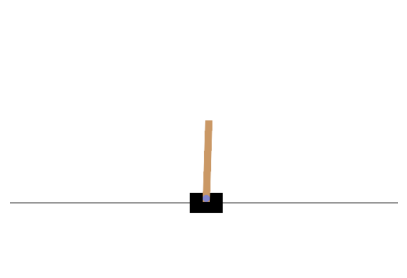

In [4]:
# Colab에 애니메이션 그리기
import matplotlib.animation as animation

fig = plt.figure(figsize=(5,5))
patch = plt.imshow(frames[0])
plt.axis('off')

def update(i):
    patch.set_data(frames[i])

ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=50)
ipythondisplay.display(ani)

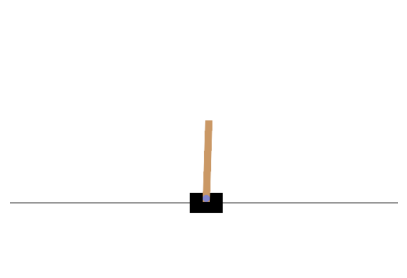

In [5]:
import gymnasium as gym
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from pyvirtualdisplay import Display

# 1) 가상 디스플레이
display = Display(visible=0, size=(1400, 900))
display.start()

# 2) 환경 & 프레임 수집
env = gym.make('CartPole-v1', render_mode='rgb_array')
obs, _ = env.reset(seed=42)
frames = []
done = False
while not done:
    action = env.action_space.sample()
    obs, reward, done, truncated, _ = env.step(action)
    frames.append(env.render())
env.close()

# 3) 애니메이션 생성
fig = plt.figure(figsize=(5,5))
patch = plt.imshow(frames[0])
plt.axis('off')

def update(i):
    patch.set_data(frames[i])

ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=50)

# 4) HTML5 비디오로 변환해 출력
HTML(ani.to_jshtml())